In [11]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import string

In [32]:
df = pd.read_csv('Reviews_data_hotel.csv')
df.head()

,Review,date,Location
0,I was very impressed with the resort.\nGreat s...,20/08/2019,Sebastian
1,The rooms were nice the outside needs work als...,20/08/2019,Los Angeles
2,Great location! I have stayed at this hotel on...,20/08/2019,Georgia
3,The hotel was adequate for my stay. The strips...,20/08/2019,NaN
4,"Great location, room was large and spacious. P...",19/08/2019,Palm Harbor


In [33]:
print('This dataset contains {} rows and {} columns'.format(df.shape[0],df.shape[1]))

This dataset contains 6444 rows and 3 columns


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6444 entries, 0 to 6443
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Review    6393 non-null   object
 1   date      6444 non-null   object
 2   Location  1711 non-null   object
dtypes: object(3)
memory usage: 151.2+ KB


In [35]:
df.isnull().sum()

Review        51
date           0
Location    4733
dtype: int64

In [36]:
df.dropna(axis=0, subset=['Review'],inplace=True)

In [37]:
df.isnull().sum()

Review         0
date           0
Location    4688
dtype: int64

In [38]:
print('This dataset contains {} rows and {} columns'.format(df.shape[0],df.shape[1]))

This dataset contains 6393 rows and 3 columns


## Removing punctuations from the reviews

In [39]:
def remove_punc(text):
    for ele in text:
        if ele in string.punctuation:
            text = text.replace(ele,'')
    return text       

In [40]:
text_str = 'Everything was great. Hello, just staying in the heart of New York was fantastic!\n\n'
remove_punc(text_str)

'Everything was great Hello just staying in the heart of New York was fantastic\n\n'

In [41]:
df['Review'] = df['Review'].map(remove_punc)

In [42]:
df.head(10)

,Review,date,Location
0,I was very impressed with the resort\nGreat st...,20/08/2019,Sebastian
1,The rooms were nice the outside needs work als...,20/08/2019,Los Angeles
2,Great location I have stayed at this hotel on ...,20/08/2019,Georgia
3,The hotel was adequate for my stay The strips ...,20/08/2019,NaN
4,Great location room was large and spacious Par...,19/08/2019,Palm Harbor
5,All the options for fun were great Do wish the...,19/08/2019,NaN
6,Old Musty Motel Bath need an update asap\n\n\n,19/08/2019,NaN
7,Loved the layout of the hotel and the relaxing...,19/08/2019,NaN
8,My wife and I loved everything about it It’s c...,19/08/2019,NaN
9,rooms were very small was told i had a complim...,19/08/2019,NaN


## Removing Stopwords from the reviews

In [23]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

def remove_stop_words(text):
    stop_words = set(stopwords.words('english'))
    
    word_tokens = word_tokenize(text)
    filter_sentence = []
    for w in word_tokens:
        if w.lower() not in stop_words:
            filter_sentence.append(w)
    return filter_sentence

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jitendra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jitendra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
# Testing of function
text = 'Very clean and friendly and I love the location The restaurant that is inside was excellent for food and service the bathrooms are a little small because they’re vintage but overall I would definitely stay again\n\n'
remove_stop_words(text)

['clean',
 'friendly',
 'love',
 'location',
 'restaurant',
 'inside',
 'excellent',
 'food',
 'service',
 'bathrooms',
 'little',
 'small',
 '’',
 'vintage',
 'overall',
 'would',
 'definitely',
 'stay']

In [25]:
df['Review'] = df['Review'].map(remove_stop_words)

In [26]:
df.head(10)

,Review,date,Location
0,"[impressed, resort, Great, staff, main, resort...",20/08/2019,Sebastian
1,"[rooms, nice, outside, needs, work, also, free...",20/08/2019,Los Angeles
2,"[Great, location, stayed, hotel, last, three, ...",20/08/2019,Georgia
3,"[hotel, adequate, stay, strips, bathtub, usele...",20/08/2019,NaN
4,"[Great, location, room, large, spacious, Parki...",19/08/2019,Palm Harbor
5,"[options, fun, great, wish, better, policy, la...",19/08/2019,NaN
6,"[Old, Musty, Motel, Bath, need, update, asap]",19/08/2019,NaN
7,"[Loved, layout, hotel, relaxing, pool, area, c...",19/08/2019,NaN
8,"[wife, loved, everything, ’, close, everything...",19/08/2019,NaN
9,"[rooms, small, told, complimentary, upgrade, e...",19/08/2019,NaN


## Generating Word cloud

In [27]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [29]:
master_list = []
k=0
for j in range(df.shape[0]):
    text = " ".join(i for i in df['Review'][df.index[k]])
    master_list.append(text)
    k+=1   

In [30]:
master_text = " ".join(i for i in master_list)
len(master_text)

930606

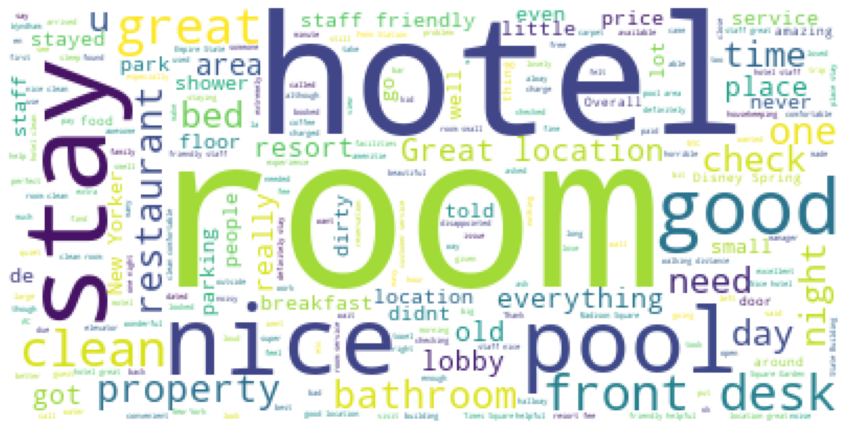

In [31]:
wordcloud = WordCloud(background_color='white', max_words=1500).generate(master_text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Removing more words

In [43]:
def remove_stop_words(text):
    stop_words = set(stopwords.words('english'))
    stop_words.update(["room","rooms", "hotel", "place", "well","stay","great","good"])
    word_tokens = word_tokenize(text)
    filter_sentence = []
    for w in word_tokens:
        if w.lower() not in stop_words:
            filter_sentence.append(w)
    return filter_sentence

In [44]:
df['Review'] = df['Review'].map(remove_stop_words)

In [45]:
df.head(10)

,Review,date,Location
0,"[impressed, resort, staff, main, resort, pool,...",20/08/2019,Sebastian
1,"[nice, outside, needs, work, also, free, break...",20/08/2019,Los Angeles
2,"[location, stayed, last, three, trips, New, York]",20/08/2019,Georgia
3,"[adequate, strips, bathtub, useless, fell, tak...",20/08/2019,NaN
4,"[location, large, spacious, Parking, easy, app...",19/08/2019,Palm Harbor
5,"[options, fun, wish, better, policy, lazy, riv...",19/08/2019,NaN
6,"[Old, Musty, Motel, Bath, need, update, asap]",19/08/2019,NaN
7,"[Loved, layout, relaxing, pool, area, con, hou...",19/08/2019,NaN
8,"[wife, loved, everything, ’, close, everything...",19/08/2019,NaN
9,"[small, told, complimentary, upgrade, empire, ...",19/08/2019,NaN


In [48]:
master_list = []
k=0
for j in range(df.shape[0]):
    text = " ".join(i for i in df['Review'][df.index[k]])
    master_list.append(text)
    k+=1 

In [49]:
master_text = " ".join(i for i in master_list)
len(master_text)

863411

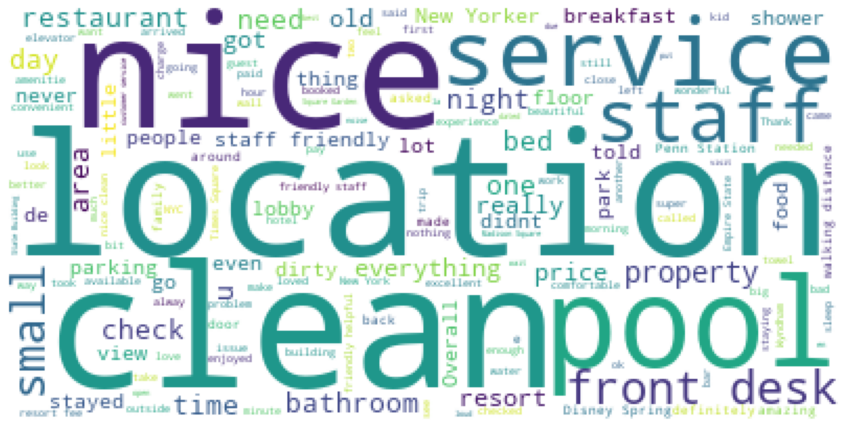

In [50]:
wordcloud = WordCloud(background_color='white', max_words=1500).generate(master_text)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [342]:
wordcloud.to_file("first_review.png")